In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cust=pd.read_excel("marketing_campaign.xlsx")

In [3]:
intcolumns=["Year_Birth","Kidhome","Teenhome","Recency","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumCatalogPurchases","NumWebVisitsMonth","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain","Z_CostContact","Z_Revenue","Response"]

In [4]:
for i in intcolumns:
    cust[i]=cust[i].astype("int64")

In [5]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   float64       
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [6]:
discrete_columns=["Kidhome","Teenhome","Recency","NumDealsPurchases","NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumWebVisitsMonth", 'Response']

In [7]:
categorical_columns=["Education","Marital_Status","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2","Complain"]


In [8]:
continuous_column=["Income","MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds"]

In [9]:
cust["NumStorePurchases"]=cust["NumStorePurchases"].astype("int64")

In [10]:
cust.drop(["Z_CostContact","Z_Revenue"], axis=1, inplace=True)

In [11]:
cust["Income"].fillna(cust["Income"].median(), inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler=StandardScaler()

In [13]:
scaler.fit_transform(cust[continuous_column])

array([[ 0.23569584,  0.98378127,  1.55157698, ...,  2.46214705,
         1.4765001 ,  0.84320691],
       [-0.23545419, -0.87047948, -0.63630116, ..., -0.65044925,
        -0.63150318, -0.72900579],
       [ 0.77399892,  0.36272278,  0.57080402, ...,  1.34527426,
        -0.14690472, -0.03876607],
       ...,
       [ 0.18947568,  1.79502034,  0.545656  , ..., -0.10116755,
        -0.36497403, -0.38388593],
       [ 0.67940139,  0.36866592,  0.09299156, ...,  0.77768317,
         0.07116458,  0.32552712],
       [ 0.02520835, -0.65355475, -0.58600511, ..., -0.65044925,
        -0.63150318, -0.4414059 ]])

In [14]:
cust_continuous=pd.DataFrame(scaler.fit_transform(cust[continuous_column]), columns=continuous_column, index=cust.index)

In [15]:
cust[continuous_column]=cust_continuous

<AxesSubplot:>

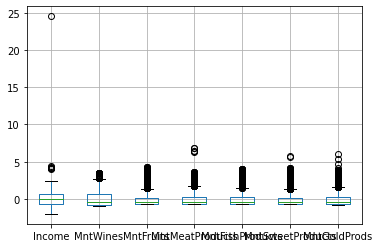

In [16]:
cust[continuous_column].boxplot()

In [17]:
cust.drop("ID", axis=1, inplace=True)

In [18]:
cust.drop("Dt_Customer", axis=1, inplace=True)

In [19]:
cust.drop("Year_Birth", axis=1, inplace=True)

In [20]:
edu_label=LabelEncoder()
marit_label=LabelEncoder()

In [21]:
cust["Education"]=pd.DataFrame(edu_label.fit_transform(cust["Education"]), index=cust.index)
cust["Marital_Status"]=pd.DataFrame(marit_label.fit_transform(cust["Marital_Status"]), index=cust.index)

In [22]:
cust["Education"].value_counts()

2    1127
4     486
3     370
0     203
1      54
Name: Education, dtype: int64

In [23]:
cust["Marital_Status"].value_counts()

3    864
5    580
4    480
2    232
6     77
1      3
0      2
7      2
Name: Marital_Status, dtype: int64

Saving Encoders and Scaler variables in pickle file

In [24]:
import pickle
# Label Encoder 
with open('edu_encoder.pkl', 'wb') as file:
    pickle.dump(edu_label, file)

with open('marit_encoder.pkl', 'wb') as file:
    pickle.dump(marit_label, file)


with open('Stadnard_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)



In [25]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

c:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\acer\anaconda3\lib\site-packages\sklearn\cluster\_k

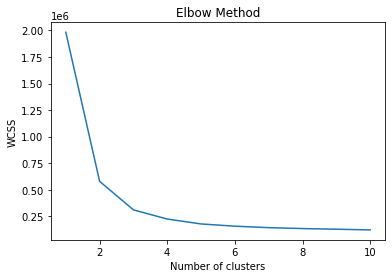

In [26]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(cust)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [27]:
cust[discrete_columns]

,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response
0,0,0,58,3,8,10,4,7,1
1,1,1,38,2,1,1,2,5,0
2,0,0,26,1,8,2,10,4,0
3,1,0,26,2,2,0,4,6,0
4,1,0,94,5,5,3,6,5,0
...,...,...,...,...,...,...,...,...,...
2235,0,1,46,2,9,3,4,5,0
2236,2,1,56,7,8,2,5,7,0
2237,0,0,91,1,2,3,13,6,0
2238,0,1,8,2,6,5,10,3,0


In [28]:
cust

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,2,4,0.235696,0,0,58,0.983781,1.551577,1.679702,2.462147,...,10,4,7,0,0,0,0,0,0,1
1,2,4,-0.235454,1,1,38,-0.870479,-0.636301,-0.713225,-0.650449,...,1,2,5,0,0,0,0,0,0,0
2,2,5,0.773999,0,0,26,0.362723,0.570804,-0.177032,1.345274,...,2,10,4,0,0,0,0,0,0,0
3,2,5,-1.022355,1,0,26,-0.870479,-0.560857,-0.651187,-0.503974,...,0,4,6,0,0,0,0,0,0,0
4,4,3,0.241888,1,0,94,-0.389085,0.419916,-0.216914,0.155164,...,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0.358936,0,1,46,1.203678,0.419916,0.066692,0.081926,...,3,4,5,0,0,0,0,0,0,0
2236,4,5,0.470432,2,1,56,0.303291,-0.661449,-0.606873,-0.687068,...,2,5,7,0,0,0,1,0,0,0
2237,2,2,0.189476,0,0,91,1.795020,0.545656,0.221789,-0.101168,...,3,13,6,0,1,0,0,0,0,0
2238,3,5,0.679401,0,1,8,0.368666,0.092992,0.208495,0.777683,...,5,10,3,0,0,0,0,0,0,0


In [29]:
from sklearn.cluster import DBSCAN
db_scan=DBSCAN(min_samples=6)
cust["DBscan_cluster"]=pd.DataFrame(db_scan.fit_predict(cust[continuous_column]), index=cust.index, columns=["DBscan_cluster"])

In [30]:
cust["DBscan_cluster"].value_counts()

 0    1196
-1    1025
 1      19
Name: DBscan_cluster, dtype: int64

In [31]:
import hdbscan
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=12, min_samples=2, algorithm="best")

In [32]:
hdbscan_model.fit(cust)

HDBSCAN(min_cluster_size=12, min_samples=2)

In [33]:
cluster_labels = hdbscan_model.labels_

In [34]:
cust["HDBSCAN"]=cluster_labels

In [35]:
cust["HDBSCAN"].value_counts()

 4    1221
-1     962
 1      17
 2      15
 3      13
 0      12
Name: HDBSCAN, dtype: int64

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using
Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.

BIRCH incrementally and dynamically clusters incoming multi-dimensional metric data points to try to produce the best quality clustering with the available resources (i. e., available memory and time constraints).

In [36]:
from sklearn.cluster import Birch

In [37]:
birch_model = Birch(threshold=0.01, n_clusters=4)

In [38]:
birch_model.fit_predict(cust)

array([0, 3, 3, ..., 2, 1, 3], dtype=int64)

In [39]:
cust["birch_model"]=birch_model.fit_predict(cust)

In [40]:
cust["birch_model"].value_counts()

0    691
2    584
1    501
3    464
Name: birch_model, dtype: int64

Barplot for Income column 


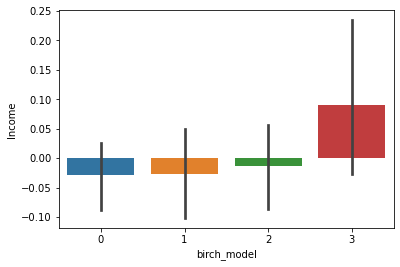

Barplot for MntWines column 


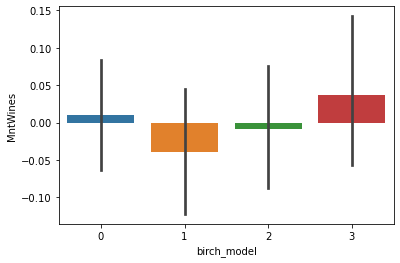

Barplot for MntFruits column 


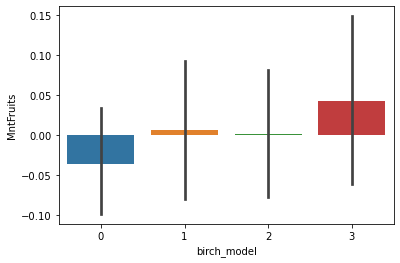

Barplot for MntMeatProducts column 


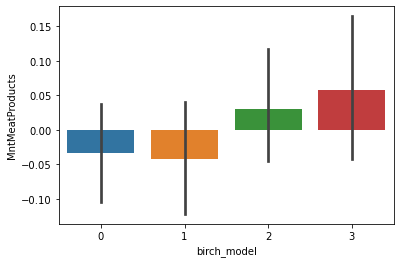

Barplot for MntFishProducts column 


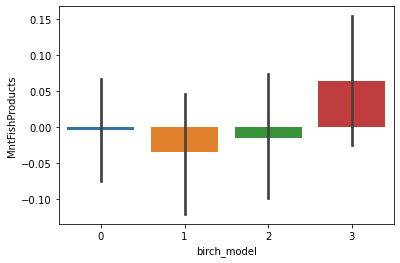

Barplot for MntSweetProducts column 


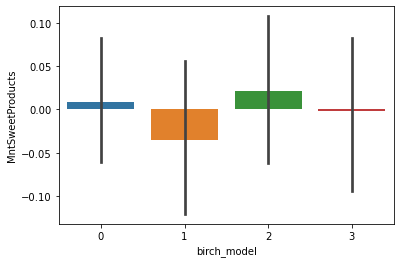

Barplot for MntGoldProds column 


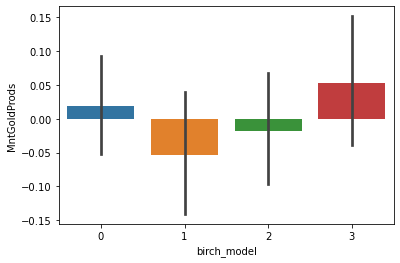

In [41]:
for i in continuous_column:
    print(f"Barplot for {i} column ")
    sns.barplot(x="birch_model",y=i, data=cust)
    plt.show()


countplot for Education column 


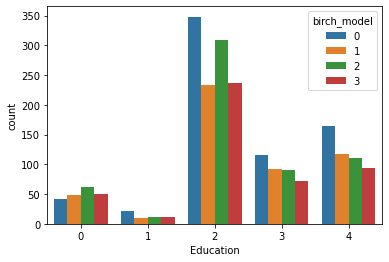

countplot for Marital_Status column 


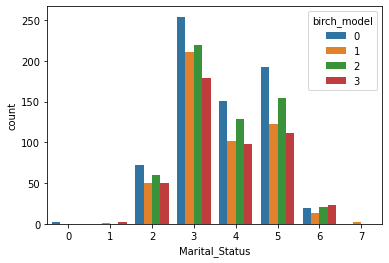

countplot for AcceptedCmp3 column 


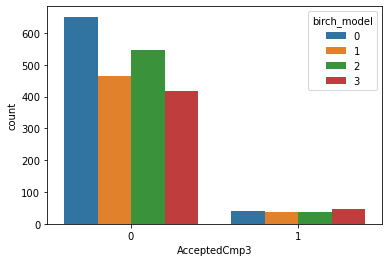

countplot for AcceptedCmp4 column 


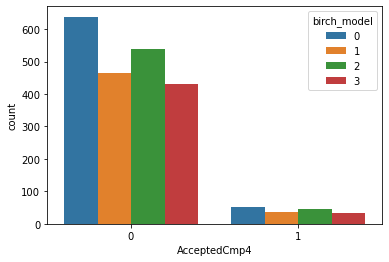

countplot for AcceptedCmp5 column 


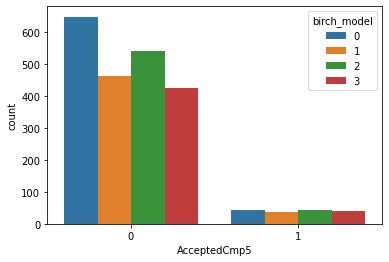

countplot for AcceptedCmp1 column 


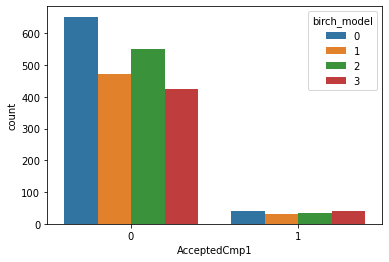

countplot for AcceptedCmp2 column 


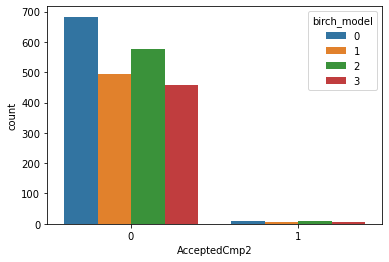

countplot for Complain column 


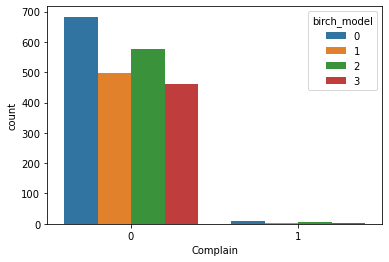

In [42]:
for i in categorical_columns:
    print(f"countplot for {i} column ")
    sns.countplot(x=i, data=cust, hue="birch_model")
    plt.show()

countplot for Kidhome column 


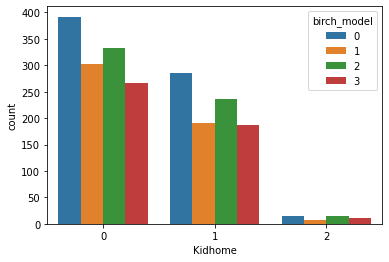

countplot for Teenhome column 


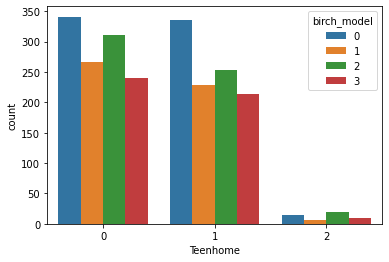

countplot for Recency column 


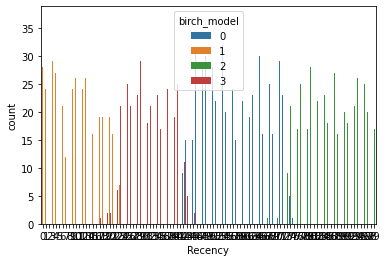

countplot for NumDealsPurchases column 


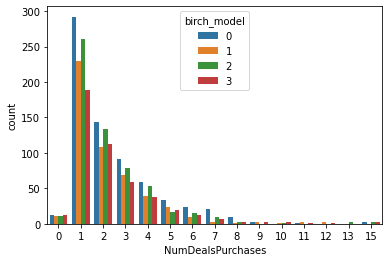

countplot for NumWebPurchases column 


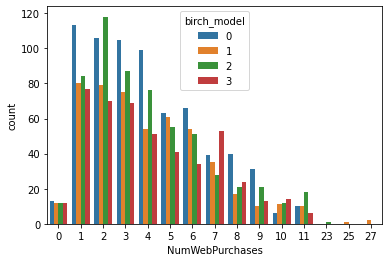

countplot for NumCatalogPurchases column 


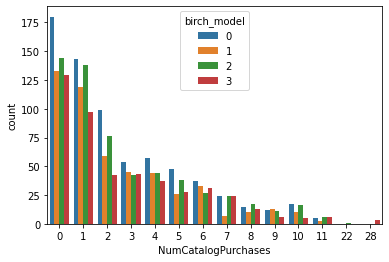

countplot for NumStorePurchases column 


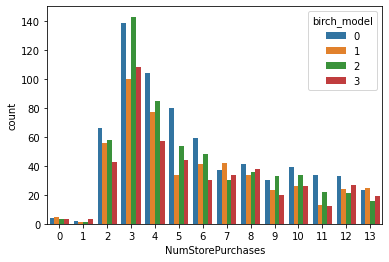

countplot for NumWebVisitsMonth column 


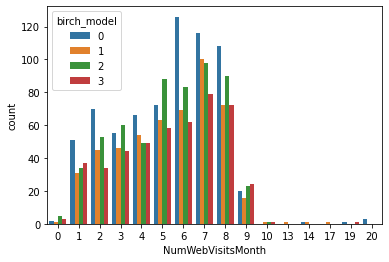

countplot for Response column 


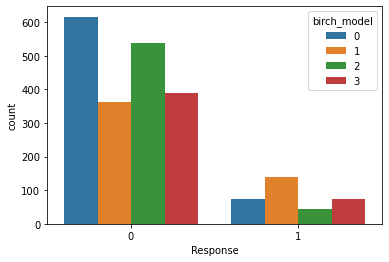

In [43]:
for i in discrete_columns:
    print(f"countplot for {i} column ")
    sns.countplot(x=i, data=cust, hue="birch_model")
    plt.show()

In [44]:
cust

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DBscan_cluster,HDBSCAN,birch_model
0,2,4,0.235696,0,0,58,0.983781,1.551577,1.679702,2.462147,...,0,0,0,0,0,0,1,-1,-1,0
1,2,4,-0.235454,1,1,38,-0.870479,-0.636301,-0.713225,-0.650449,...,0,0,0,0,0,0,0,0,4,3
2,2,5,0.773999,0,0,26,0.362723,0.570804,-0.177032,1.345274,...,0,0,0,0,0,0,0,-1,-1,3
3,2,5,-1.022355,1,0,26,-0.870479,-0.560857,-0.651187,-0.503974,...,0,0,0,0,0,0,0,0,4,3
4,4,3,0.241888,1,0,94,-0.389085,0.419916,-0.216914,0.155164,...,0,0,0,0,0,0,0,-1,-1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,3,0.358936,0,1,46,1.203678,0.419916,0.066692,0.081926,...,0,0,0,0,0,0,0,-1,-1,0
2236,4,5,0.470432,2,1,56,0.303291,-0.661449,-0.606873,-0.687068,...,0,0,0,1,0,0,0,0,4,0
2237,2,2,0.189476,0,0,91,1.795020,0.545656,0.221789,-0.101168,...,0,1,0,0,0,0,0,-1,-1,2
2238,3,5,0.679401,0,1,8,0.368666,0.092992,0.208495,0.777683,...,0,0,0,0,0,0,0,-1,2,1


In [45]:
cust["DBscan_cluster"].unique()

array([-1,  0,  1], dtype=int64)

In [46]:
cust["HDBSCAN"].unique()

array([-1,  4,  3,  2,  0,  1], dtype=int64)

In [47]:
cust["birch_model"].unique()

array([0, 3, 2, 1], dtype=int64)

In [48]:
cust.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response', 'DBscan_cluster', 'HDBSCAN', 'birch_model'],
      dtype='object')

Model Buildling

In [49]:
cust.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,DBscan_cluster,HDBSCAN,birch_model
0,2,4,0.235696,0,0,58,0.983781,1.551577,1.679702,2.462147,...,0,0,0,0,0,0,1,-1,-1,0
1,2,4,-0.235454,1,1,38,-0.870479,-0.636301,-0.713225,-0.650449,...,0,0,0,0,0,0,0,0,4,3
2,2,5,0.773999,0,0,26,0.362723,0.570804,-0.177032,1.345274,...,0,0,0,0,0,0,0,-1,-1,3
3,2,5,-1.022355,1,0,26,-0.870479,-0.560857,-0.651187,-0.503974,...,0,0,0,0,0,0,0,0,4,3
4,4,3,0.241888,1,0,94,-0.389085,0.419916,-0.216914,0.155164,...,0,0,0,0,0,0,0,-1,-1,2


In [50]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [51]:
x=cust.drop(['DBscan_cluster', 'HDBSCAN', 'birch_model'], axis=1)
y=cust['birch_model']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [53]:
rf_classifier = RandomForestClassifier(n_estimators=110, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

In [54]:

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9754464285714286


In [55]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 110,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [56]:
estimators=[20,50,70,90,110,130,160,190,220,250,300,350,400,450,500,550,575]

In [57]:
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators=i, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, f"WIth Estimators : {i}")

Accuracy: 0.9620535714285714 WIth Estimators : 20
Accuracy: 0.9776785714285714 WIth Estimators : 50
Accuracy: 0.9709821428571429 WIth Estimators : 70
Accuracy: 0.9754464285714286 WIth Estimators : 90
Accuracy: 0.9754464285714286 WIth Estimators : 110
Accuracy: 0.9776785714285714 WIth Estimators : 130
Accuracy: 0.9821428571428571 WIth Estimators : 160
Accuracy: 0.9821428571428571 WIth Estimators : 190
Accuracy: 0.9799107142857143 WIth Estimators : 220
Accuracy: 0.9821428571428571 WIth Estimators : 250
Accuracy: 0.9821428571428571 WIth Estimators : 300
Accuracy: 0.9821428571428571 WIth Estimators : 350
Accuracy: 0.9821428571428571 WIth Estimators : 400
Accuracy: 0.9821428571428571 WIth Estimators : 450
Accuracy: 0.9821428571428571 WIth Estimators : 500
Accuracy: 0.9821428571428571 WIth Estimators : 550
Accuracy: 0.9821428571428571 WIth Estimators : 575


In [58]:
for i in estimators:
    gb_classifier = GradientBoostingClassifier(n_estimators=i, random_state=42)
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, f"WIth Estimators : {i}")

Accuracy: 0.9709821428571429 WIth Estimators : 20
Accuracy: 0.9799107142857143 WIth Estimators : 50
Accuracy: 0.9799107142857143 WIth Estimators : 70
Accuracy: 0.9799107142857143 WIth Estimators : 90
Accuracy: 0.9799107142857143 WIth Estimators : 110
Accuracy: 0.9776785714285714 WIth Estimators : 130
Accuracy: 0.9799107142857143 WIth Estimators : 160
Accuracy: 0.9776785714285714 WIth Estimators : 190
Accuracy: 0.9776785714285714 WIth Estimators : 220
Accuracy: 0.9776785714285714 WIth Estimators : 250
Accuracy: 0.9776785714285714 WIth Estimators : 300
Accuracy: 0.9799107142857143 WIth Estimators : 350
Accuracy: 0.9799107142857143 WIth Estimators : 400
Accuracy: 0.9799107142857143 WIth Estimators : 450
Accuracy: 0.9799107142857143 WIth Estimators : 500
Accuracy: 0.9799107142857143 WIth Estimators : 550
Accuracy: 0.9799107142857143 WIth Estimators : 575


In [59]:
import xgboost as xgb

In [60]:
for i in estimators:
    xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)
    gb_classifier.fit(X_train, y_train)
    y_pred = gb_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy, f"WIth Estimators : {i}")

Accuracy: 0.9799107142857143 WIth Estimators : 20
Accuracy: 0.9799107142857143 WIth Estimators : 50
Accuracy: 0.9799107142857143 WIth Estimators : 70
Accuracy: 0.9799107142857143 WIth Estimators : 90
Accuracy: 0.9799107142857143 WIth Estimators : 110
Accuracy: 0.9799107142857143 WIth Estimators : 130
Accuracy: 0.9799107142857143 WIth Estimators : 160
Accuracy: 0.9799107142857143 WIth Estimators : 190
Accuracy: 0.9799107142857143 WIth Estimators : 220
Accuracy: 0.9799107142857143 WIth Estimators : 250
Accuracy: 0.9799107142857143 WIth Estimators : 300
Accuracy: 0.9799107142857143 WIth Estimators : 350
Accuracy: 0.9799107142857143 WIth Estimators : 400
Accuracy: 0.9799107142857143 WIth Estimators : 450
Accuracy: 0.9799107142857143 WIth Estimators : 500
Accuracy: 0.9799107142857143 WIth Estimators : 550
Accuracy: 0.9799107142857143 WIth Estimators : 575


In [61]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

In [62]:
xgb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9799107142857143


In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=4, random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 150]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150}
Accuracy: 0.9776785714285714


In [65]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [66]:

# Define the parameter grids for each classifier
rf_param_grid = {
    'n_estimators': [100, 110, 200, 300],
    'max_depth': [None, 5, 10]
}

gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

svm_param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.1, 0.01, 0.001]
}

lgbm_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the classifiers
rf_classifier = RandomForestClassifier()
gb_classifier = GradientBoostingClassifier()
xgb_classifier = XGBClassifier()
svm_classifier = SVC()
lgbm_classifier = LGBMClassifier()

# Create a dictionary of classifiers and their corresponding parameter grids
classifiers = {
    'Random Forest': (rf_classifier, rf_param_grid),
    'Gradient Boosting': (gb_classifier, gb_param_grid),
    'XGBoost': (xgb_classifier, xgb_param_grid),
    'SVM': (svm_classifier, svm_param_grid),
    'LightGBM': (lgbm_classifier, lgbm_param_grid)
}

# Perform grid search cross-validation for each classifier
for name, (classifier, param_grid) in classifiers.items():
    print(f"Performing grid search for {name}...")
    grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3)
    grid_search.fit(X_train, y_train)
    
    # Get the best parameters and best model
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Make predictions on the test set using the best model
    y_pred = best_model.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)

Performing grid search for Random Forest...
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.9799107142857143
Performing grid search for Gradient Boosting...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.9776785714285714
Performing grid search for XGBoost...
Best Parameters: {'learning_rate': 0.01, 'n_estimators': 300}
Accuracy: 0.9754464285714286
Performing grid search for SVM...
Best Parameters: {'C': 1, 'gamma': 0.01}
Accuracy: 0.9866071428571429
Performing grid search for LightGBM...
Best Parameters: {'learning_rate': 0.1, 'n_estimators': 200}
Accuracy: 0.9821428571428571


In [67]:
# Decision Trees, Naive Bayes Classifier:, Neural network, Knn

In [68]:
svm_classifier = SVC(C=1, gamma=0.01)
svm_classifier.fit(X_train,y_train)

SVC(C=1, gamma=0.01)

In [69]:
accuracy = accuracy_score(y_test, svm_classifier.predict(X_test))

In [70]:
accuracy

0.9866071428571429

In [71]:
X_test

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
324,2,4,-0.470350,0,1,78,0.356780,-0.233933,-0.216914,-0.558902,...,2,8,8,0,0,0,0,0,0,0
96,2,6,-0.172655,0,1,72,0.597477,-0.661449,-0.624598,-0.687068,...,4,6,6,0,1,0,0,0,0,0
2104,1,3,-1.520031,0,0,40,-0.897224,-0.485413,-0.691069,-0.394118,...,0,4,6,0,0,0,0,0,0,0
1259,2,5,0.975338,0,0,91,1.283910,0.922876,3.452241,3.322688,...,7,11,2,0,0,1,1,0,0,0
1061,2,5,0.517651,0,2,34,1.304711,-0.183637,0.062260,-0.467355,...,6,11,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,3,3,1.212272,0,0,26,2.294244,1.048616,-0.283385,-0.156096,...,4,8,1,0,1,1,0,0,0,1
1340,2,5,-0.084330,0,1,88,-0.088956,-0.661449,-0.646755,-0.613830,...,1,6,6,0,1,0,0,0,0,0
755,0,5,0.464080,0,0,28,0.163627,0.218732,0.651630,1.015705,...,3,13,4,0,0,0,0,0,0,0
2138,3,2,0.415423,0,1,76,-0.594123,-0.359673,-0.527109,-0.613830,...,2,5,2,0,0,0,0,0,0,0


In [72]:
with open('svm_classifier.pkl', 'wb') as file:
    pickle.dump(svm_classifier, file)

In [73]:
X_test.dtypes

Education                int32
Marital_Status           int32
Income                 float64
Kidhome                  int64
Teenhome                 int64
Recency                  int64
MntWines               float64
MntFruits              float64
MntMeatProducts        float64
MntFishProducts        float64
MntSweetProducts       float64
MntGoldProds           float64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Response                 int64
dtype: object

In [76]:
X_test.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Response'],
      dtype='object')